## Convolution Neural Network to count number of simple objects (squares, in this case) in an image

In [18]:
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.utils import plot_model
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

### Generating training images

Images with different number of small black squares

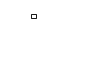

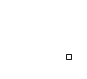

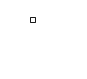

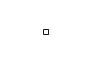

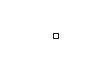

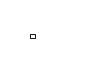

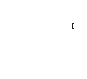

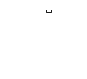

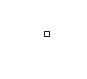

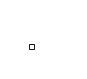

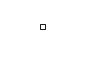

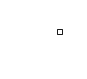

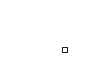

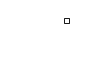

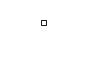

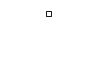

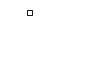

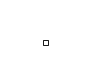

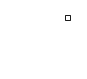

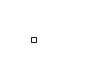

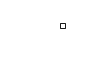

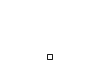

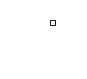

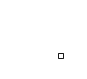

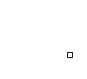

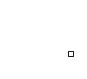

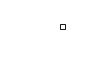

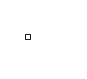

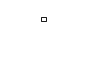

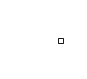

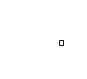

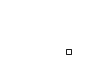

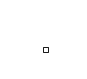

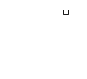

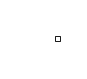

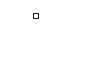

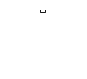

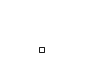

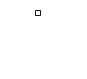

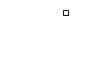

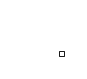

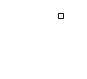

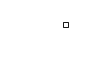

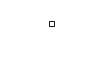

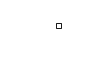

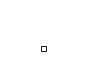

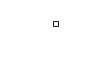

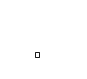

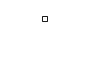

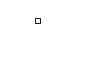

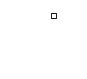

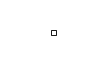

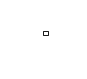

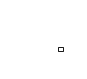

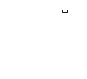

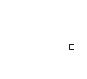

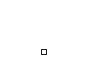

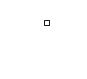

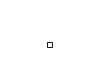

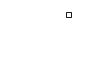

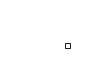

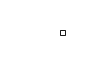

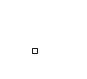

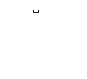

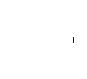

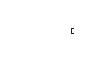

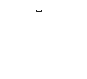

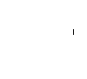

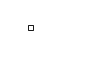

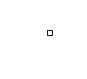

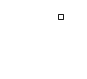

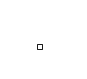

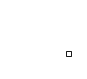

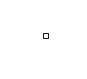

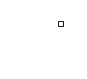

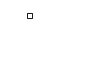

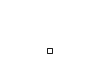

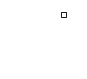

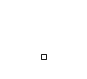

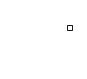

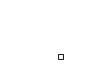

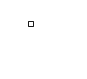

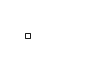

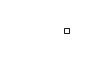

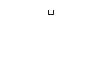

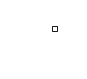

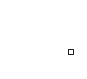

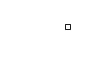

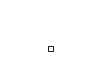

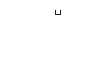

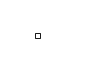

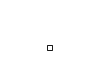

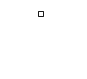

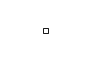

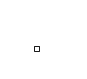

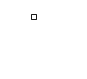

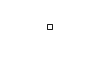

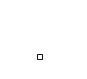

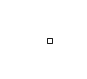

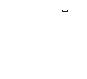

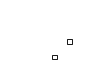

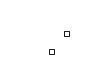

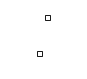

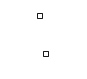

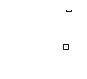

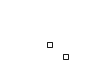

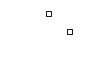

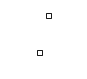

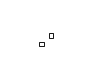

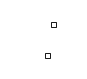

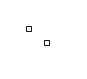

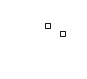

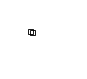

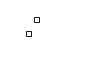

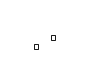

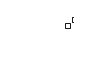

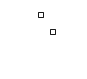

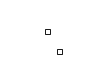

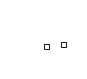

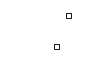

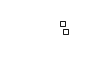

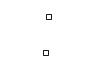

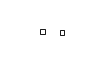

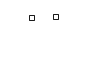

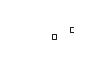

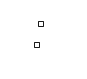

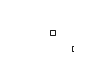

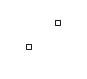

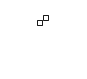

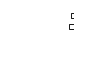

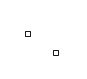

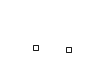

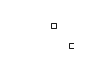

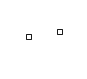

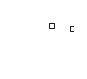

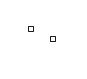

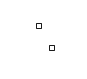

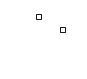

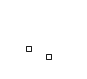

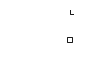

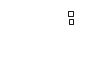

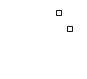

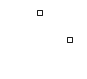

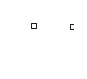

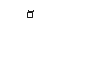

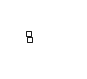

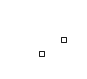

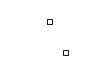

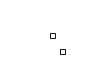

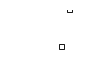

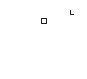

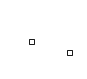

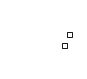

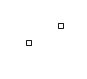

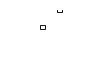

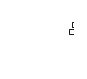

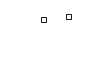

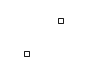

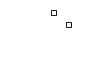

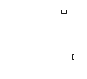

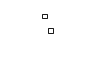

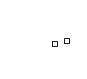

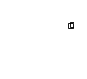

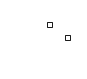

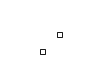

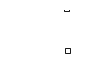

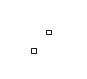

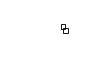

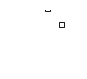

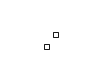

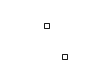

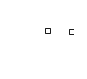

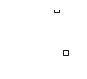

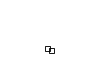

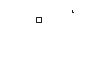

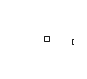

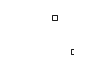

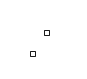

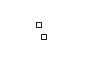

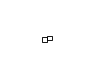

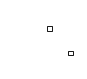

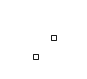

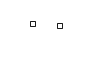

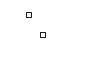

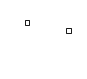

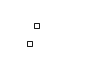

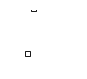

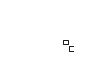

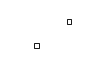

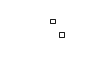

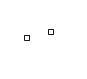

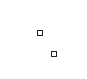

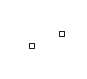

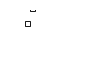

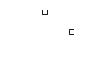

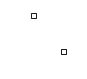

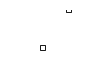

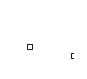

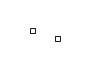

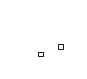

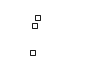

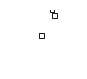

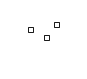

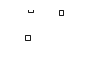

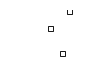

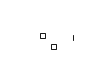

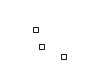

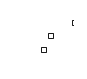

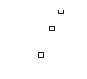

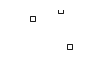

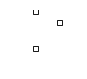

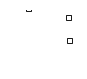

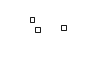

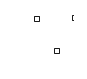

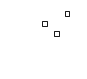

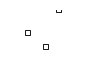

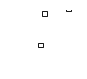

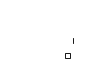

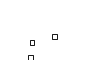

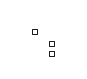

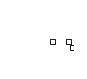

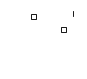

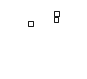

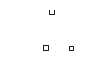

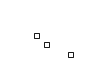

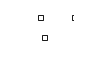

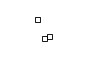

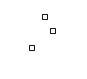

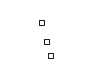

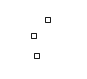

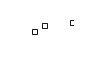

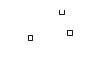

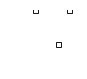

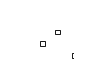

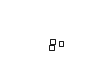

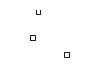

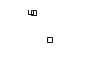

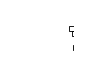

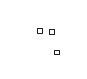

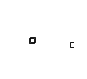

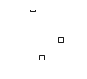

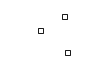

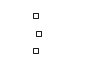

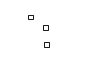

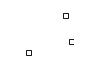

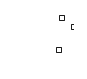

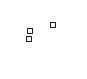

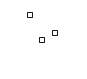

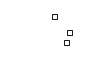

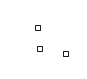

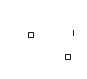

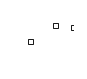

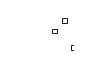

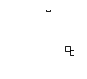

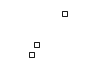

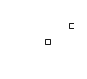

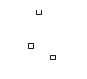

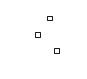

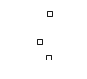

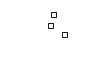

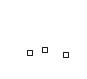

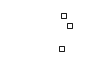

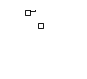

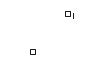

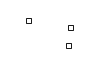

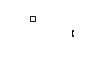

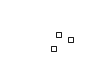

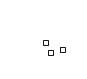

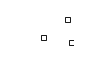

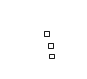

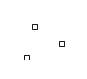

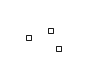

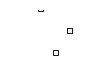

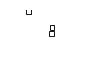

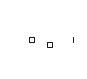

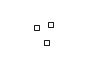

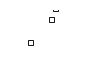

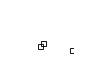

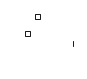

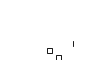

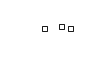

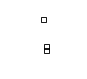

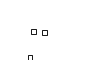

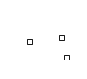

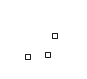

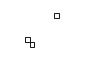

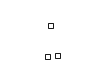

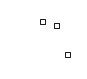

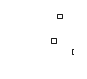

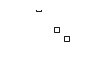

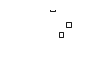

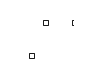

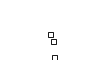

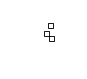

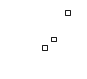

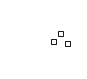

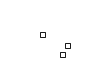

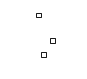

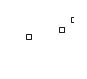

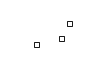

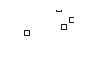

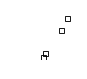

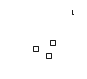

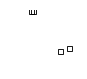

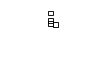

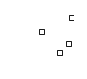

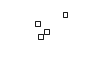

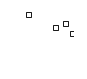

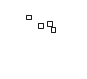

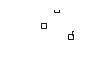

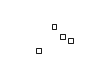

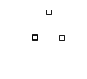

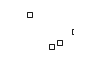

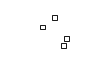

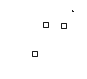

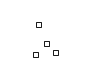

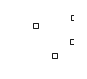

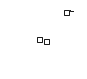

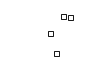

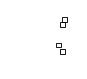

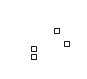

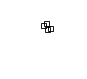

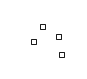

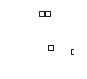

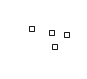

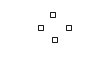

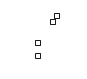

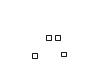

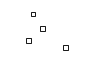

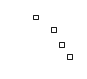

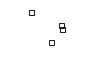

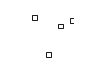

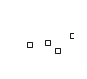

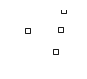

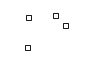

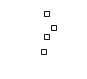

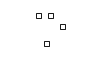

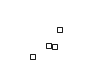

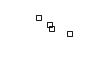

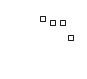

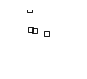

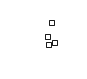

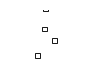

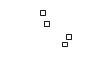

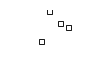

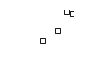

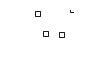

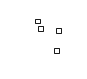

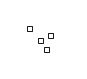

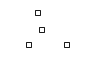

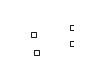

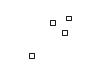

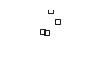

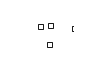

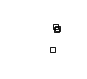

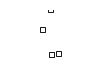

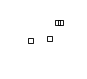

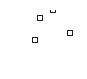

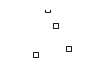

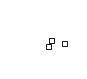

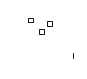

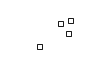

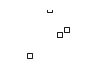

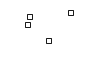

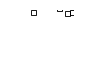

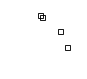

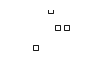

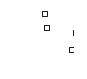

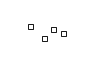

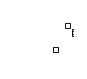

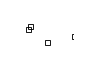

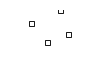

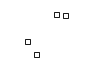

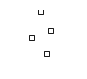

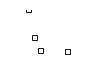

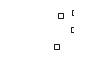

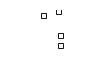

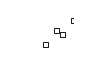

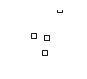

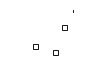

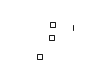

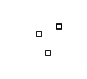

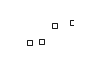

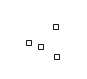

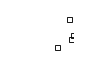

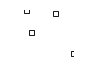

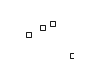

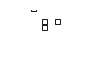

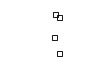

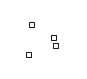

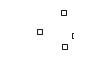

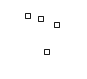

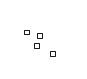

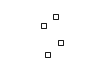

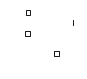

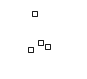

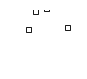

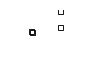

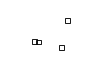

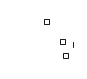

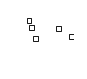

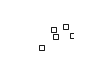

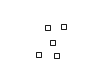

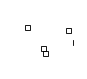

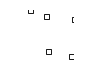

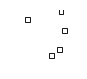

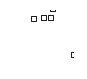

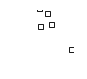

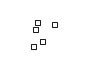

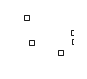

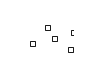

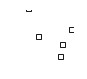

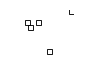

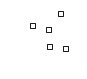

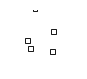

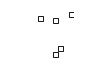

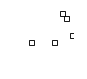

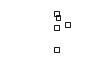

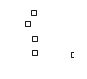

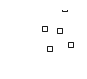

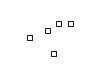

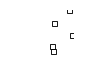

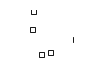

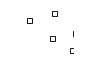

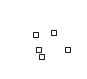

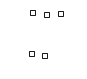

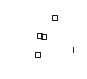

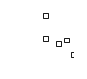

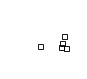

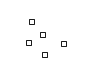

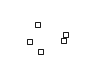

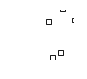

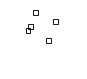

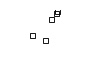

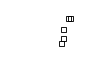

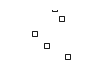

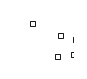

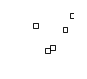

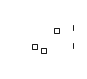

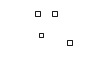

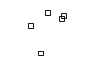

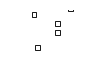

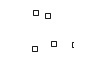

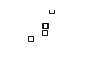

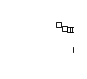

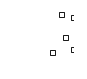

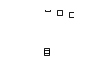

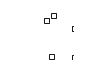

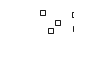

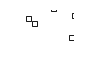

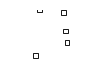

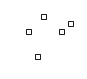

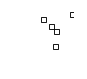

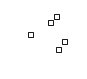

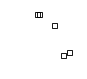

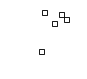

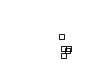

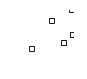

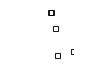

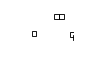

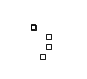

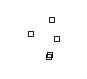

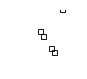

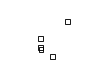

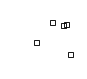

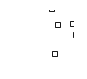

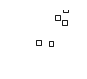

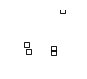

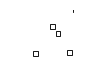

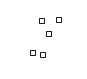

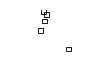

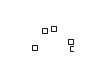

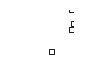

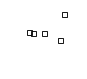

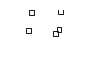

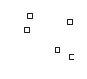

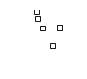

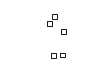

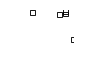

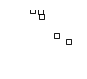

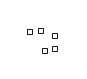

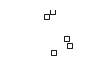

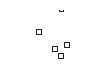

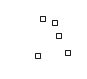

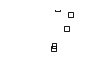

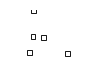

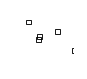

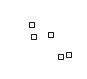

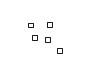

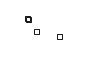

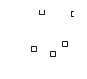

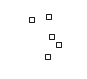

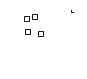

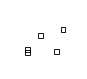

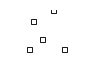

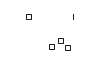

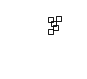

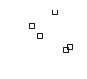

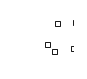

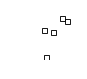

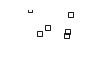

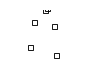

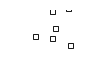

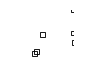

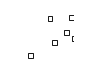

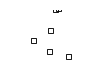

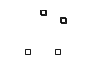

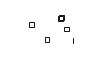

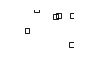

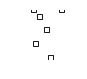

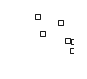

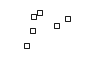

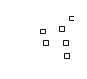

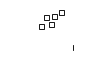

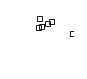

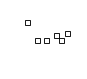

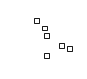

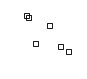

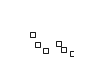

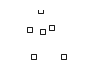

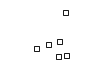

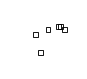

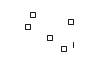

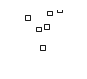

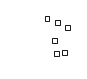

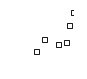

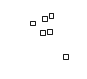

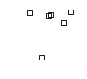

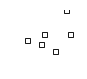

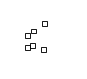

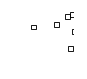

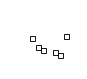

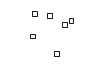

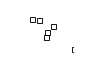

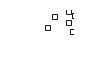

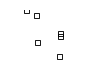

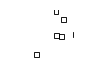

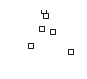

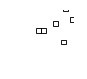

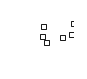

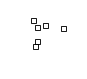

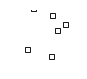

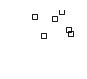

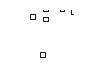

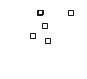

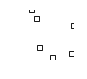

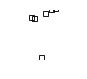

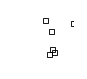

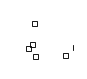

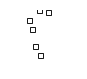

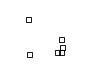

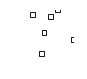

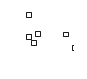

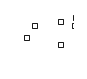

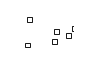

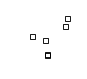

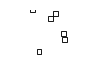

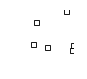

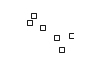

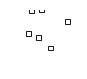

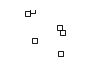

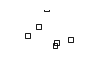

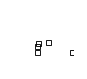

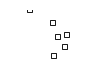

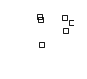

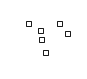

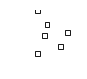

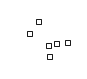

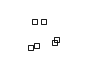

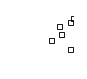

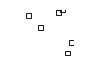

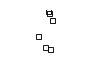

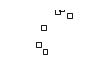

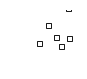

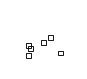

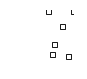

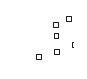

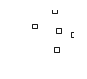

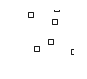

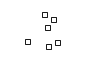

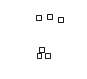

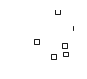

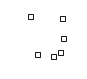

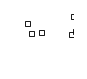

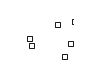

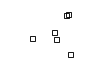

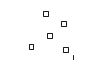

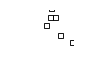

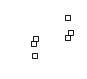

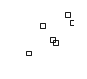

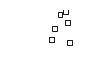

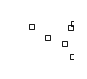

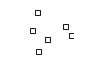

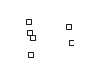

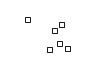

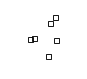

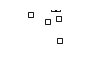

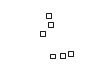

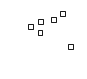

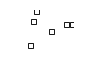

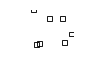

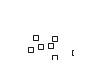

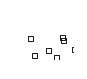

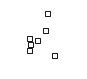

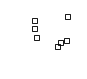

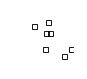

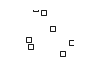

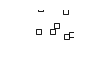

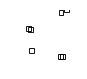

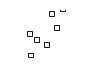

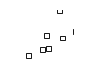

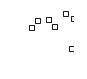

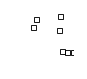

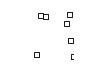

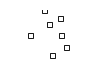

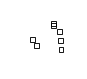

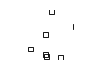

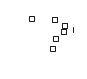

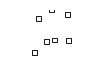

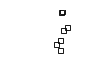

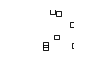

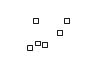

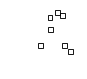

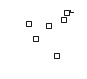

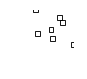

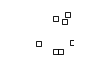

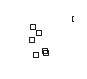

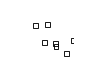

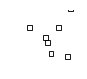

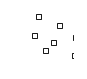

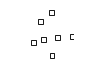

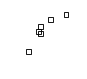

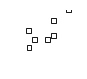

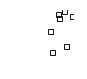

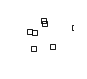

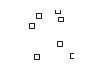

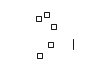

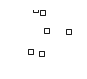

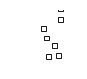

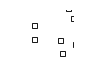

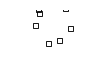

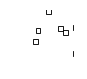

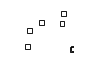

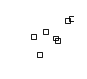

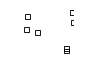

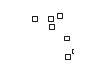

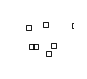

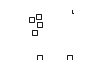

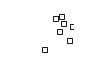

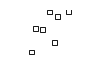

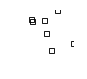

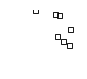

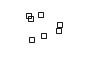

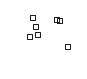

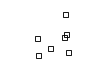

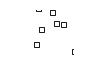

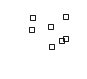

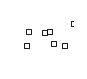

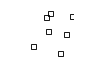

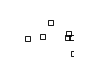

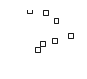

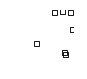

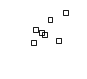

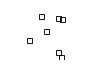

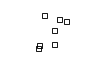

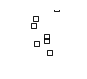

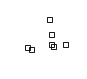

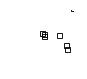

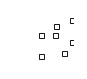

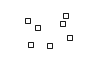

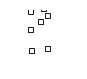

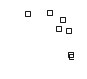

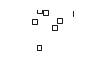

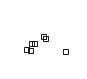

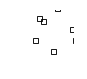

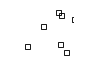

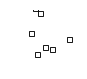

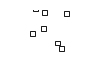

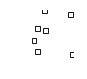

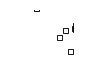

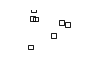

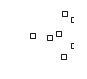

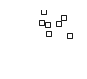

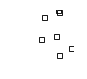

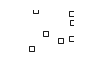

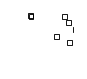

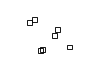

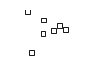

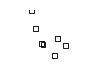

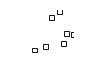

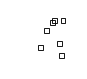

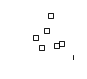

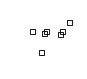

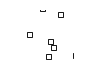

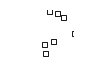

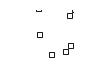

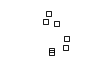

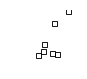

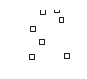

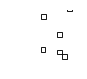

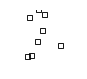

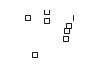

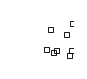

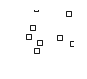

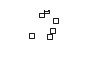

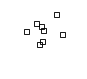

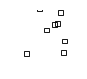

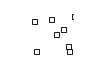

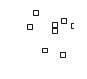

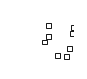

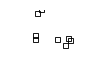

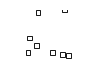

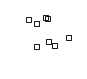

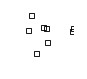

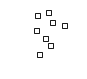

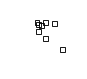

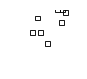

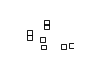

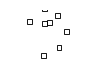

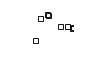

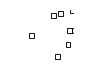

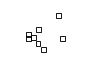

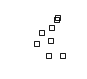

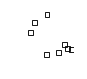

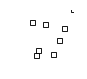

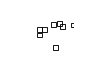

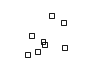

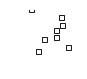

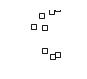

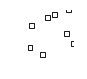

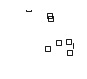

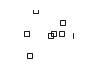

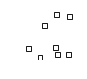

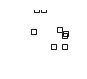

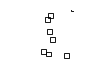

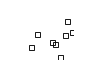

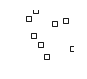

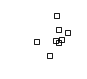

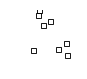

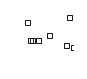

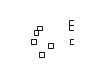

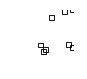

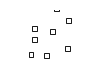

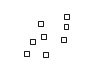

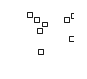

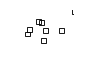

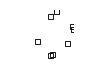

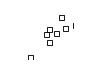

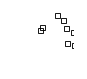

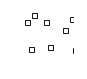

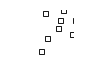

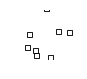

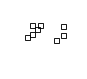

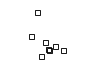

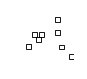

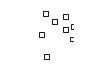

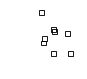

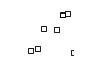

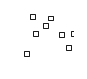

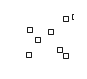

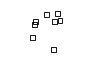

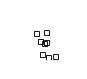

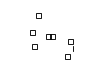

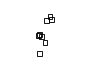

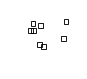

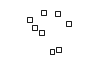

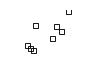

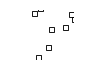

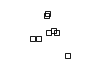

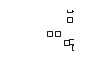

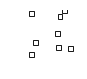

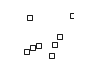

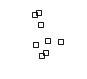

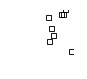

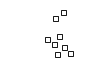

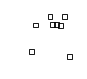

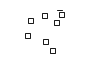

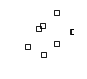

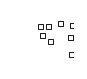

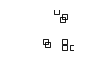

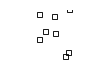

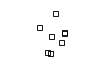

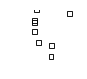

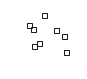

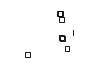

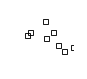

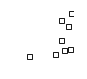

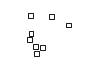

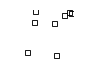

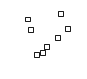

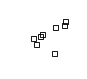

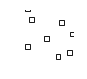

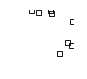

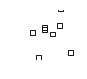

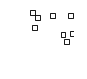

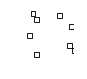

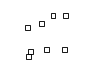

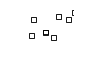

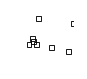

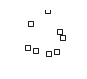

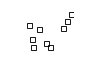

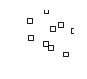

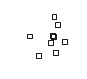

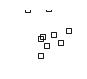

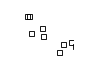

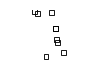

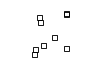

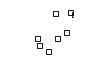

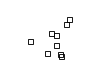

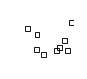

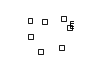

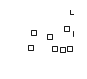

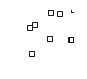

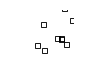

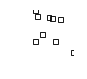

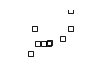

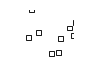

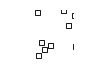

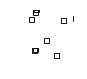

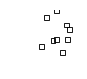

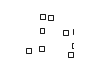

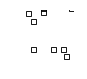

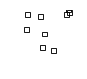

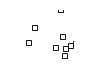

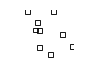

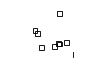

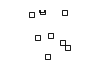

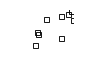

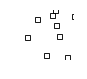

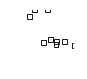

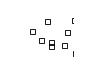

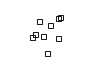

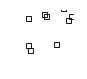

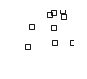

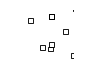

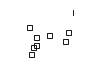

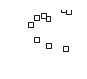

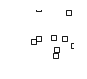

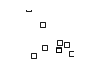

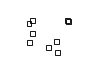

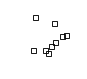

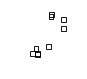

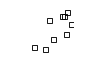

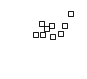

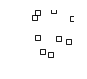

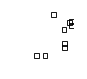

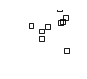

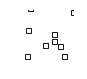

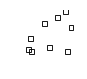

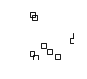

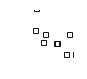

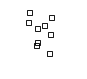

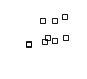

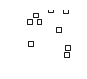

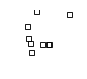

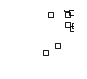

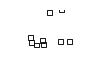

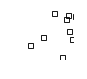

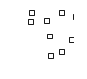

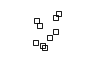

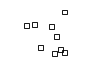

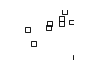

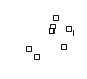

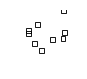

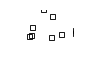

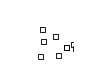

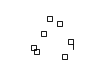

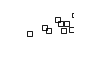

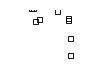

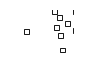

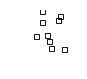

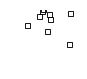

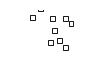

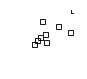

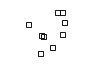

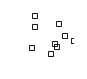

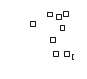

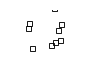

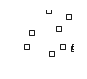

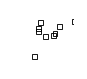

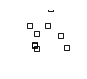

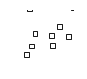

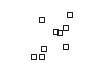

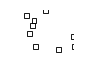

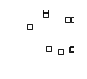

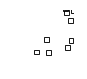

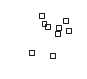

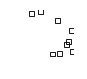

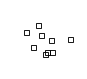

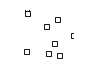

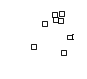

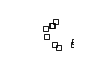

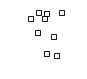

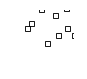

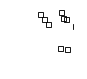

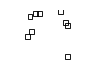

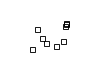

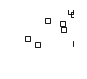

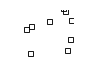

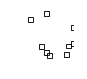

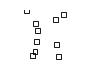

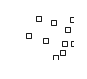

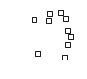

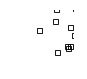

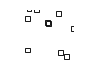

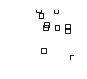

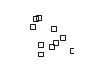

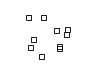

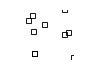

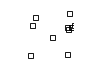

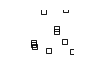

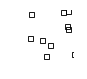

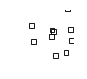

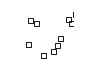

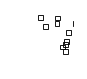

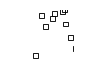

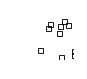

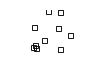

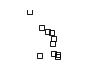

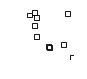

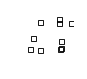

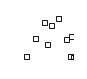

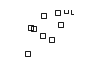

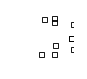

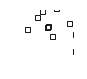

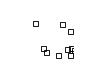

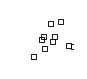

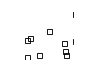

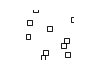

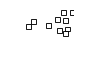

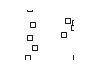

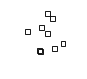

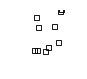

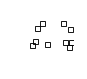

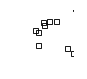

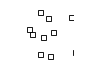

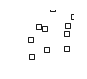

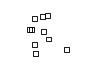

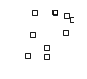

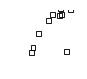

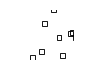

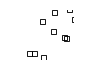

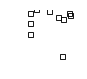

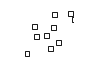

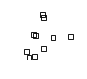

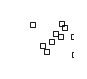

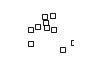

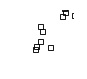

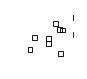

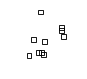

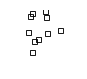

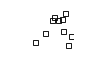

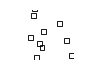

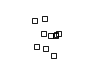

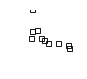

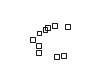

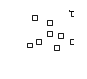

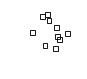

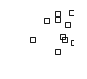

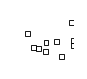

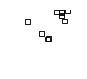

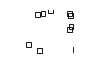

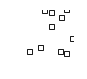

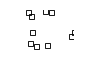

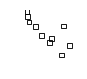

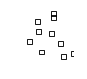

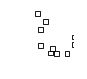

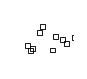

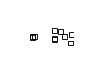

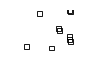

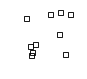

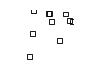

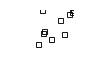

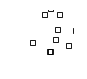

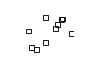

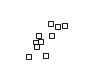

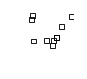

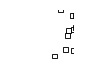

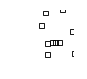

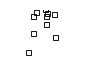

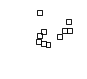

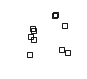

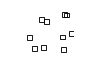

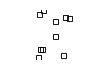

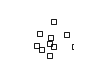

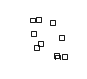

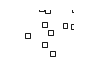

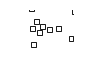

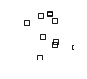

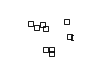

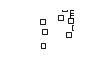

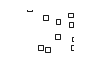

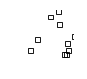

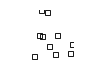

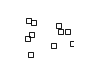

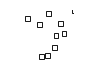

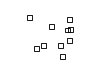

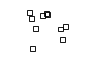

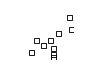

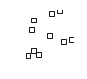

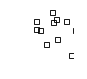

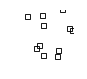

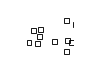

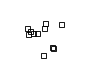

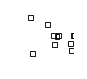

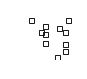

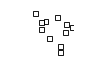

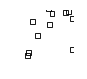

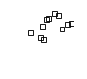

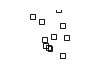

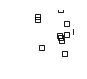

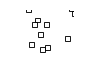

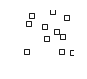

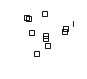

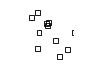

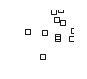

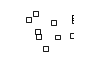

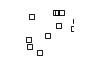

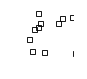

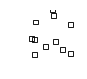

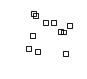

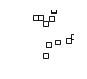

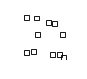

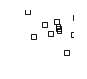

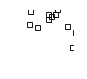

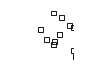

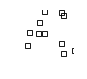

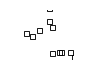

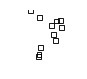

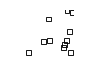

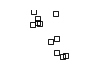

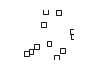

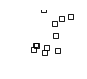

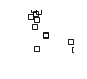

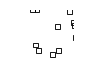

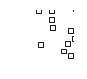

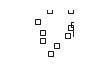

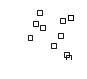

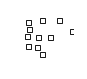

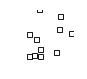

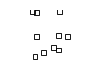

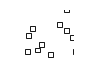

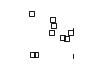

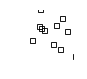

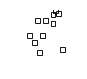

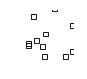

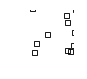

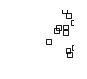

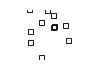

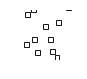

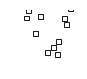

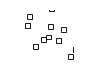

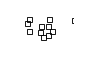

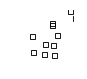

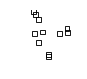

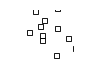

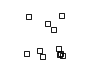

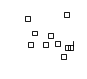

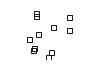

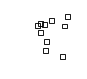

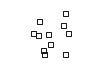

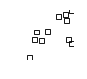

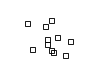

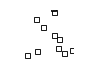

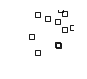

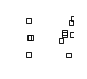

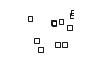

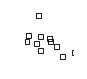

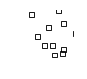

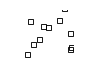

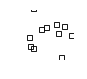

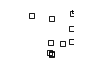

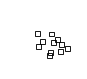

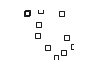

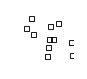

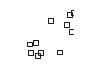

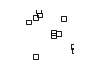

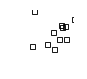

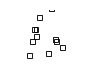

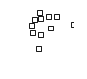

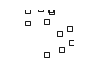

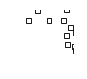

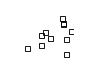

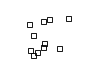

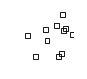

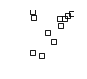

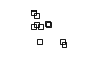

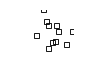

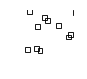

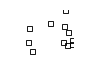

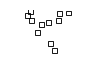

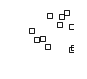

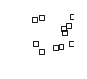

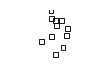

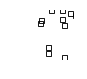

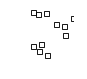

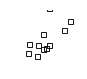

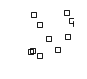

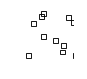

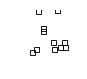

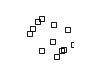

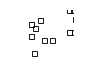

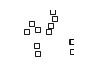

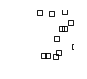

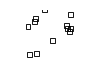

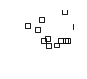

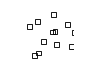

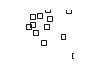

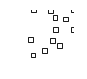

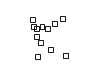

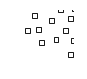

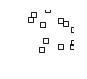

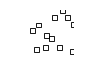

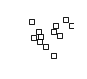

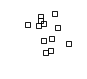

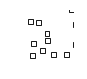

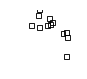

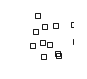

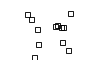

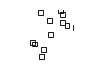

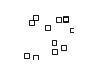

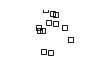

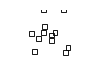

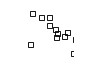

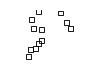

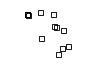

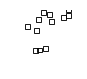

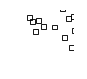

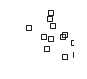

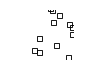

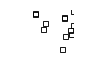

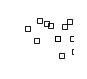

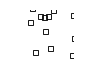

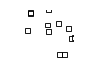

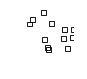

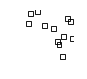

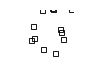

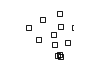

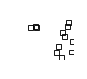

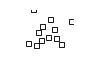

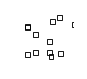

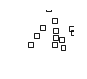

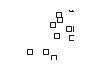

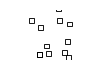

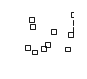

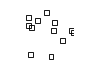

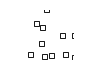

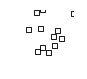

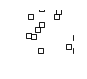

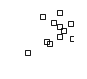

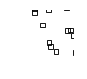

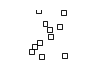

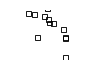

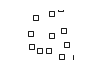

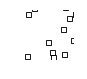

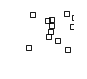

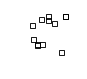

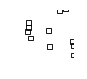

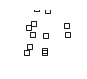

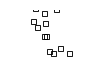

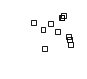

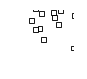

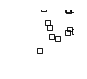

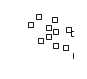

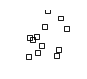

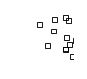

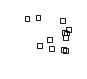

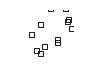

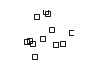

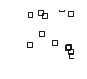

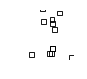

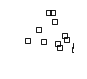

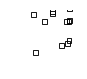

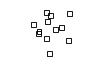

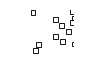

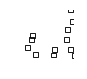

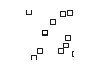

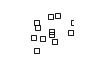

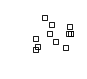

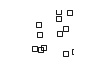

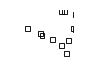

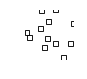

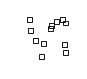

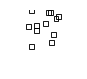

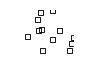

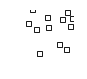

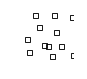

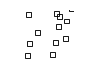

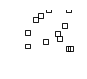

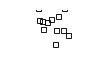

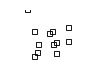

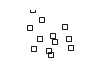

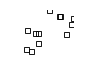

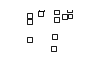

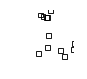

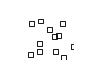

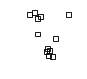

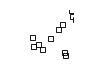

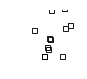

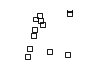

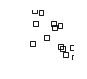

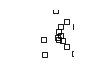

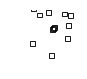

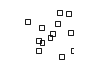

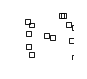

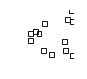

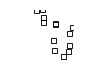

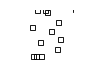

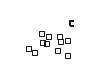

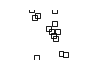

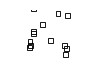

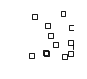

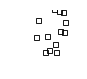

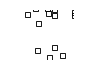

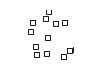

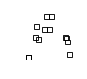

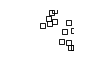

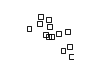

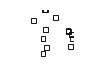

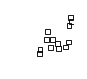

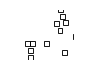

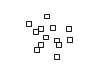

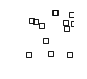

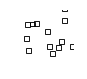

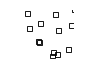

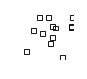

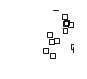

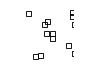

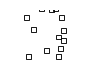

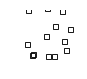

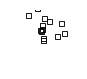

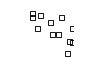

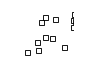

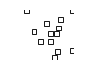

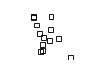

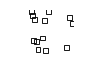

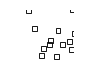

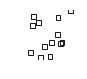

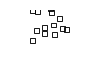

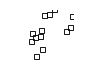

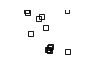

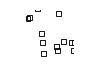

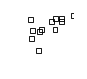

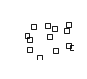

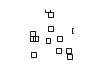

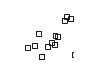

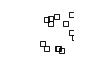

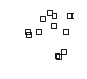

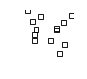

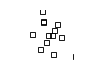

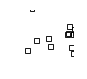

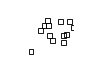

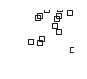

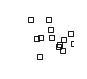

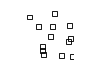

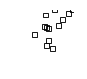

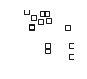

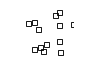

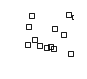

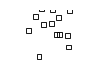

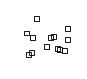

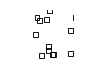

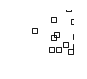

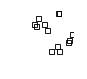

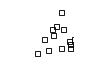

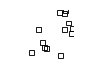

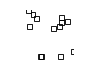

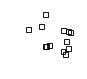

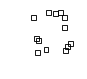

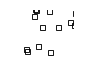

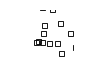

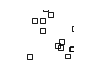

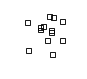

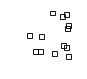

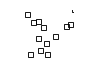

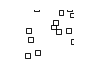

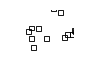

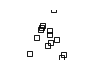

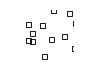

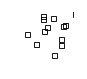

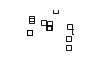

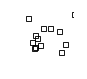

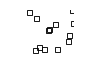

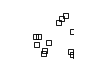

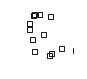

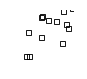

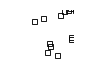

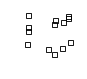

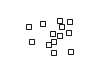

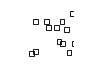

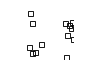

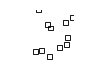

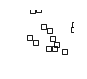

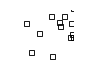

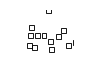

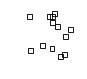

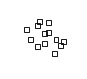

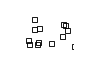

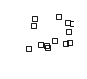

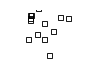

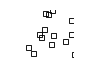

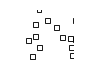

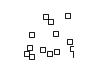

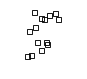

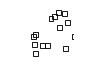

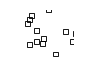

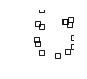

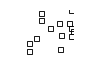

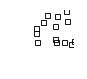

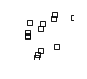

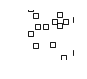

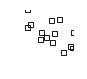

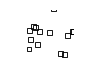

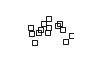

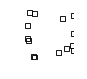

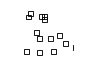

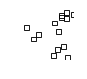

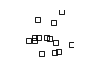

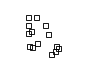

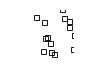

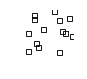

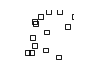

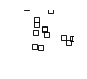

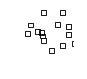

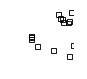

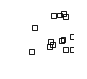

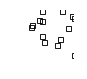

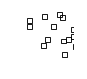

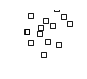

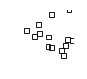

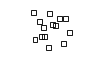

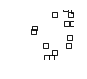

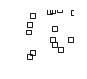

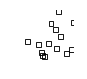

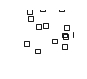

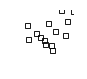

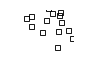

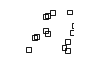

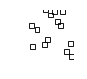

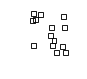

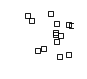

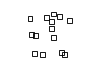

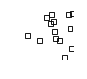

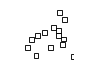

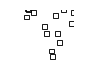

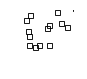

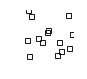

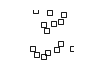

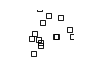

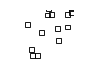

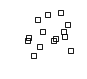

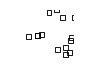

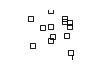

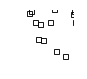

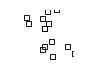

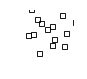

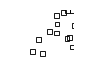

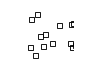

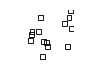

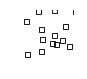

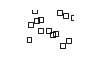

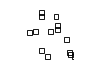

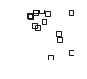

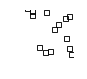

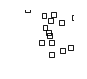

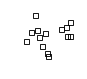

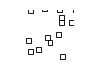

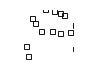

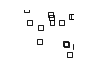

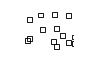

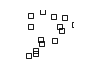

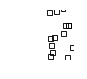

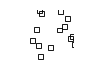

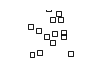

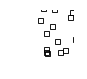

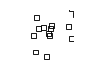

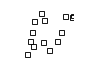

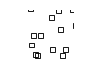

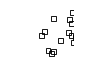

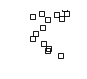

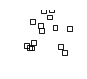

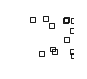

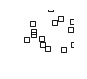

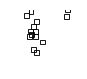

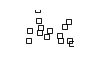

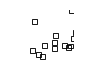

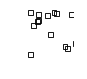

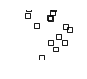

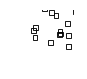

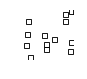

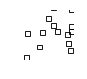

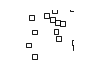

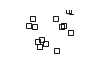

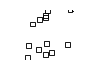

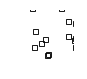

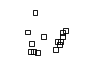

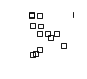

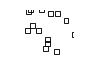

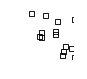

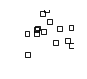

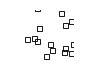

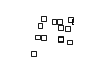

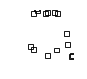

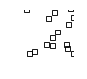

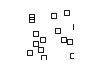

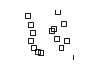

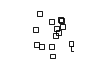

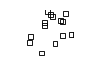

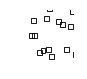

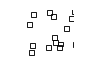

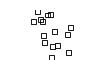

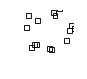

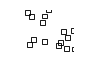

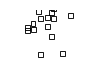

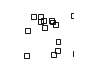

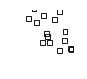

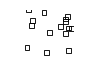

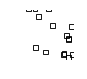

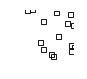

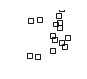

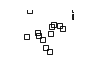

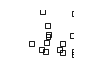

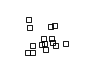

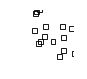

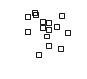

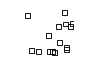

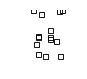

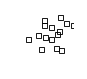

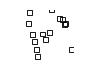

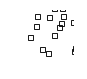

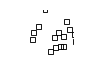

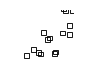

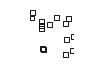

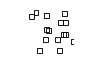

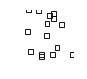

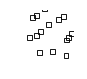

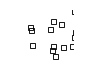

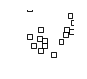

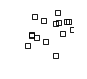

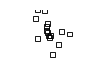

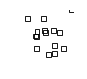

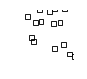

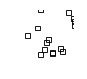

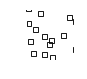

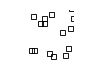

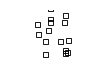

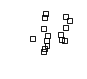

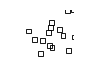

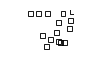

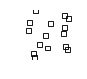

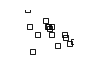

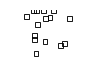

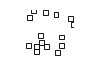

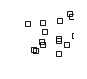

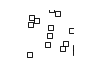

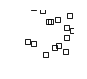

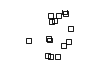

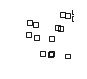

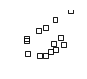

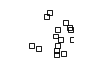

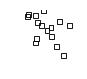

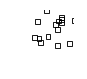

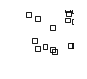

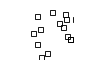

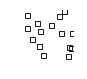

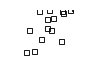

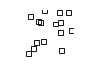

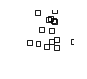

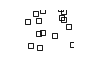

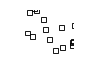

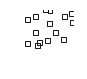

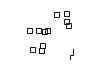

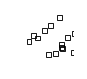

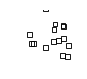

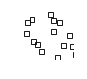

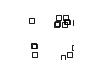

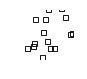

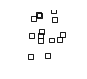

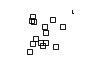

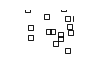

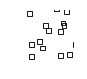

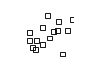

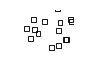

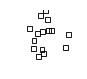

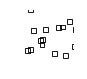

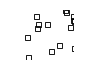

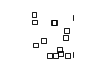

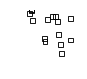

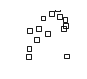

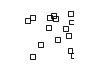

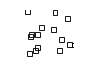

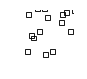

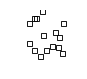

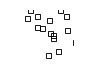

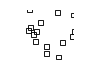

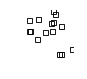

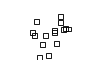

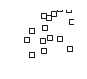

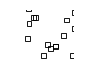

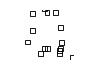

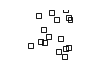

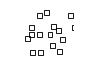

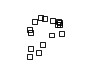

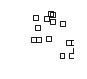

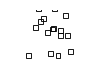

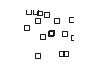

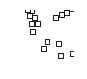

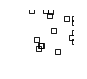

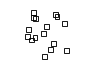

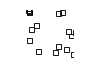

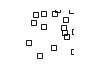

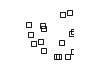

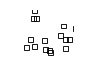

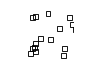

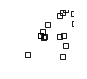

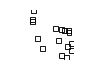

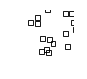

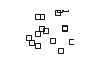

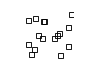

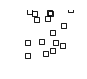

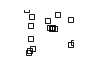

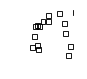

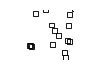

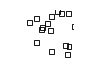

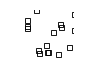

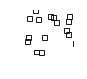

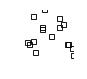

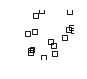

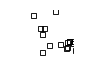

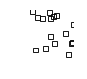

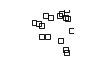

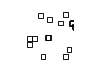

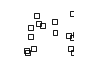

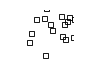

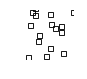

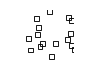

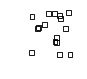

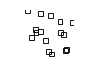

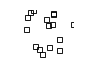

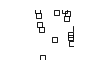

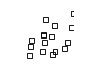

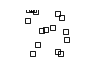

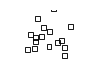

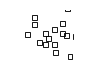

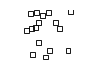

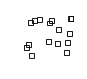

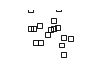

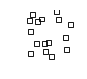

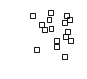

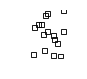

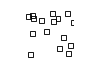

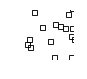

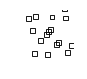

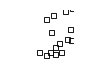

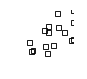

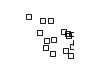

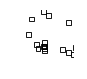

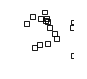

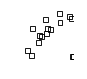

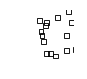

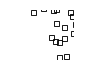

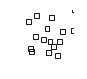

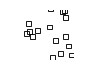

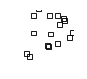

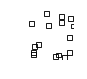

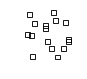

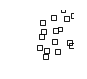

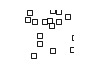

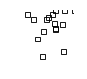

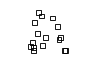

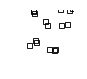

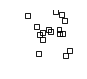

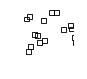

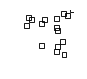

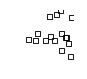

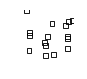

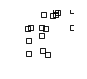

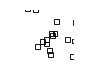

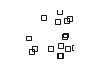

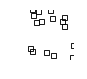

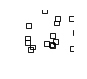

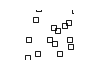

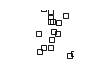

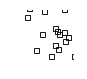

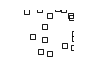

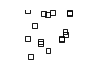

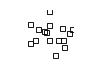

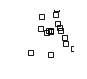

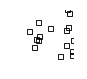

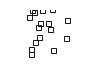

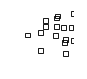

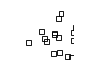

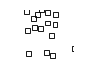

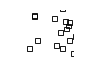

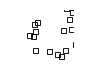

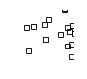

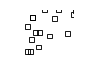

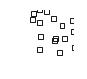

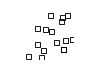

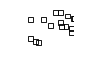

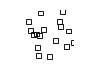

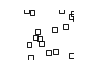

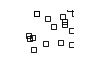

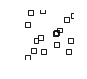

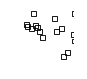

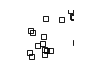

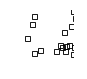

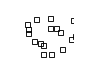

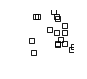

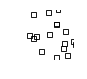

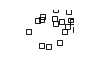

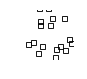

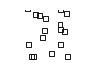

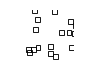

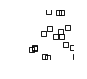

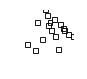

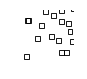

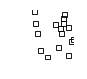

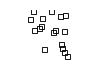

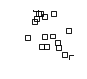

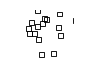

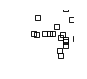

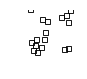

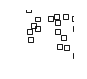

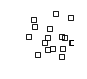

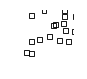

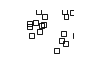

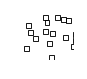

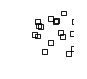

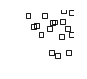

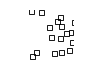

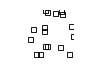

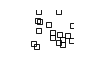

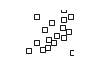

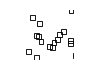

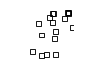

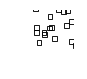

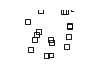

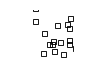

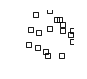

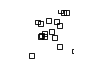

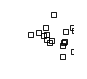

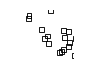

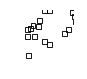

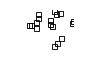

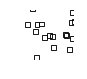

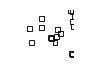

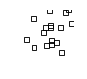

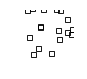

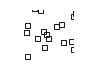

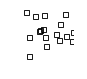

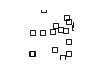

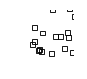

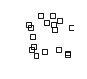

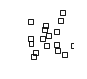

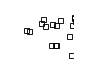

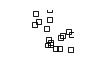

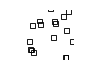

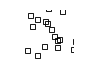

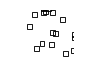

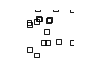

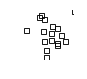

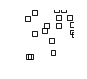

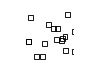

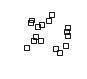

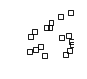

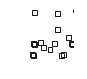

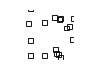

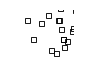

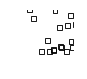

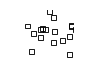

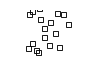

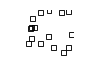

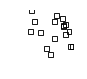

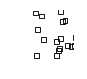

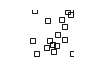

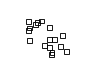

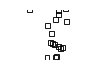

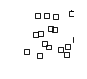

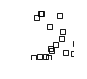

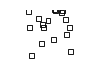

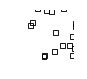

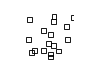

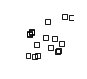

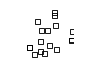

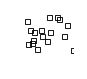

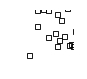

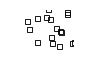

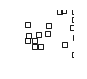

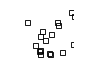

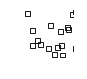

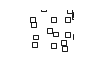

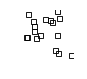

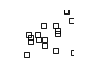

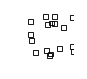

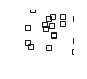

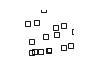

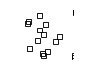

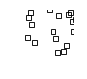

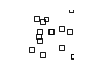

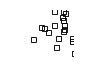

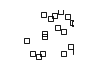

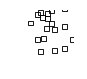

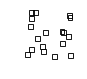

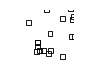

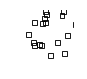

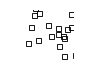

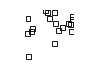

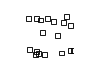

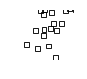

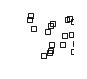

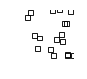

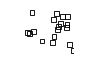

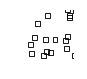

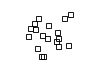

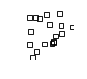

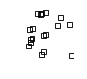

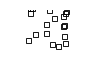

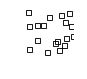

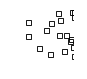

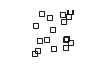

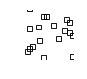

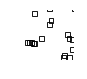

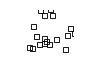

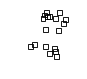

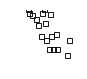

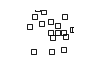

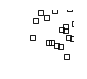

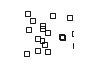

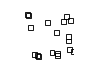

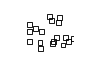

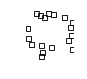

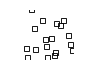

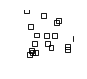

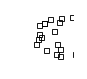

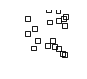

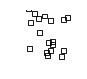

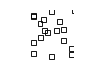

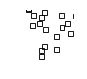

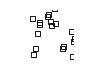

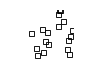

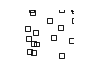

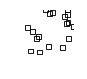

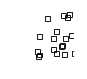

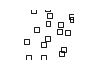

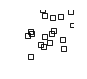

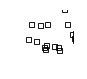

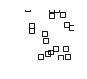

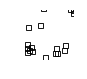

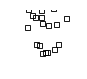

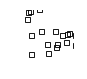

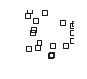

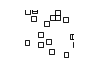

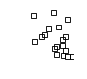

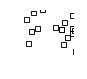

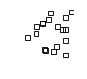

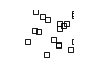

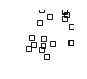

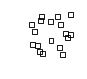

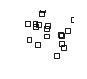

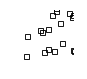

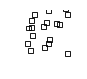

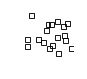

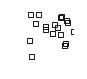

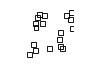

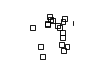

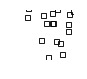

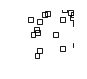

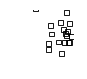

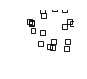

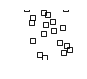

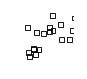

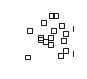

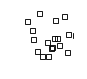

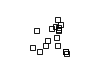

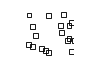

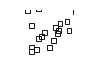

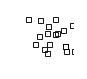

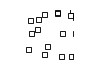

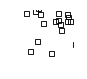

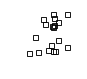

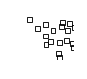

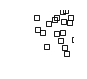

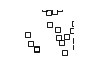

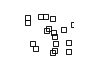

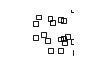

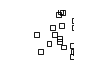

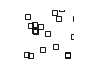

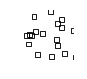

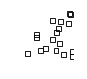

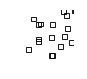

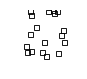

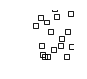

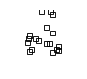

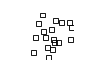

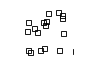

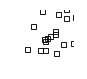

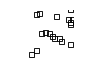

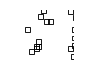

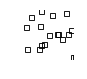

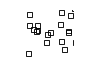

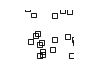

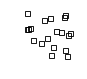

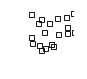

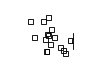

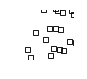

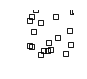

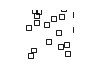

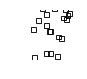

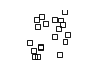

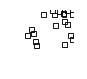

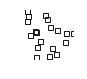

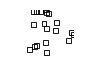

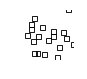

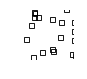

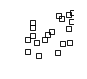

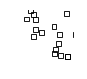

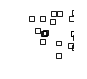

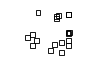

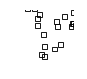

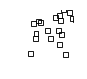

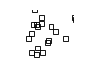

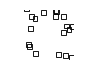

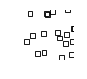

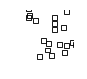

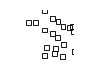

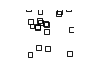

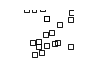

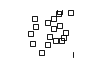

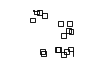

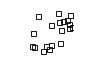

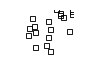

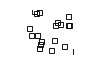

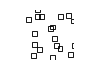

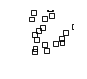

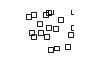

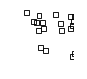

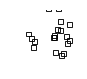

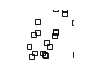

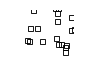

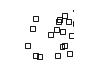

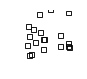

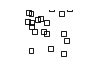

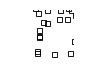

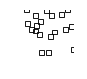

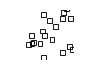

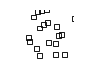

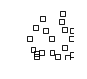

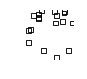

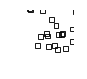

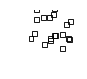

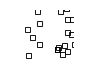

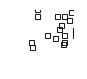

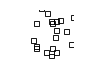

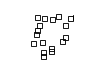

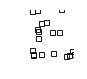

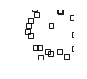

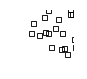

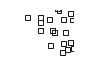

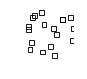

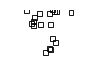

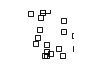

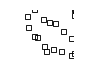

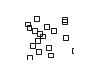

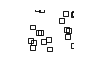

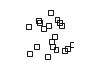

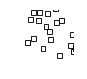

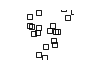

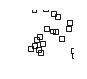

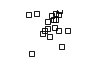

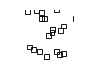

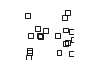

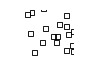

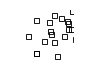

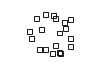

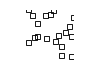

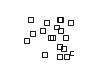

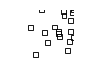

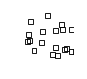

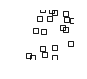

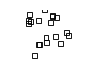

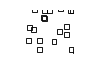

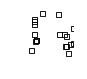

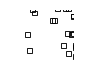

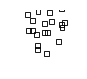

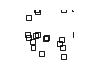

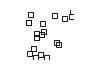

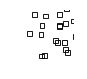

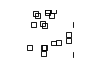

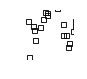

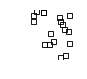

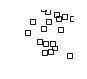

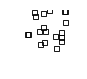

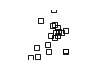

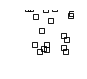

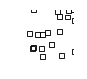

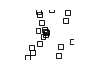

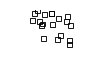

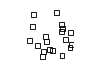

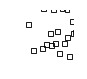

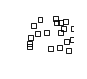

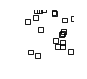

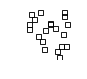

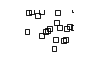

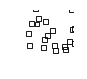

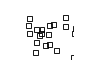

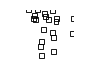

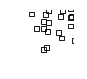

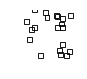

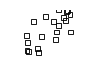

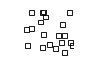

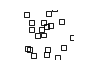

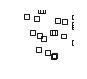

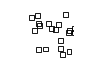

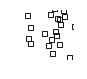

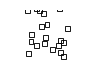

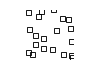

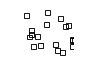

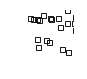

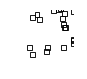

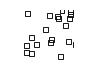

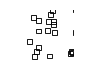

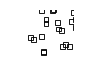

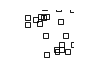

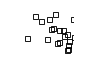

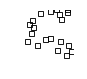

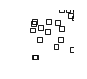

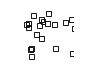

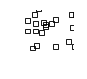

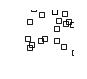

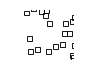

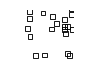

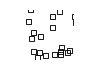

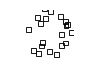

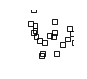

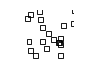

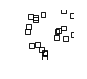

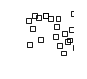

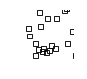

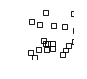

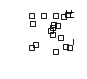

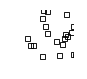

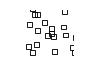

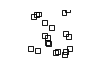

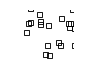

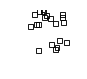

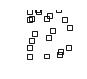

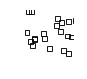

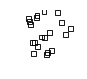

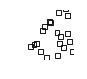

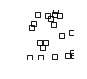

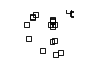

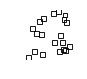

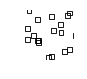

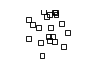

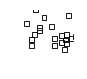

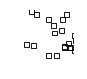

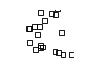

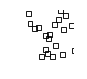

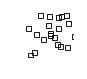

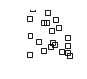

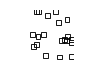

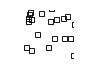

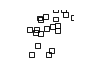

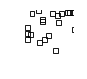

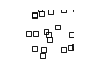

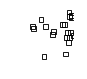

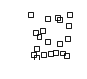

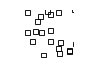

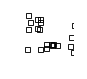

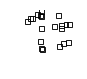

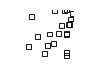

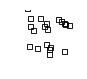

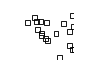

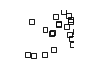

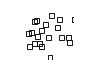

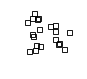

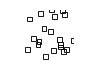

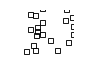

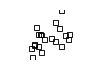

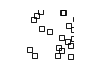

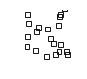

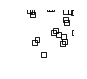

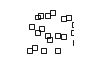

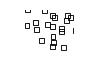

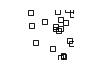

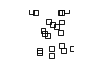

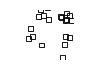

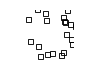

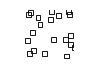

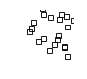

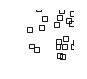

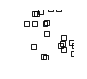

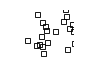

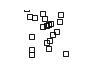

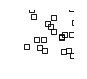

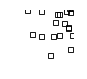

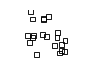

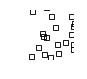

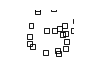

In [8]:
def get_figure(count=1):
    fig = plt.figure(figsize=(1, 1), dpi=64, facecolor='white')
    plot = fig.add_subplot(111)
    for i in range(count):
        x = np.random.random()
        y = np.random.random()
        side = 0.1
        plot.add_patch(
            patches.Rectangle(
                (x, y),
                side,
                side,
                fc='none'
            )
        )
    fig.canvas.draw()
    plt.axis('off')
    w,h = fig.canvas.get_width_height()
    buf = np.fromstring(fig.canvas.tostring_argb(), dtype=np.uint8)
    buf.shape = ( w, h, 4 ) 
    buf = np.roll ( buf, 3, axis = 2 )
    data = buf[:,:,:3].sum(axis=-1)
    data = data / 3.
    plt.show()
    plt.close()
    return data

max_count=20
n_each=100
data = []
for i in range(max_count):
    for j in range(n_each):
       data.append(get_figure(i+1))


### Building Convolution Neural Network

In [12]:
x_train = data
x_train = np.expand_dims(x_train, -1)
x_train = x_train.astype('float32')
x_train /= 255 # Normalization

# Get Labels
y_train = np.expand_dims(np.arange(1,max_count+1),-1)
y_train = np.repeat(y_train,n_each,-1).reshape([-1,1])
y_train = y_train.astype('float32')
y_train /= max_count # Normalization

# Model Architecture

model = Sequential()

# Convolutional Layer 1
model.add(Conv2D(64, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))

# Convolutional Layer 2
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))

# Pooling Layer
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Convolutional Layer 3
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))

# Convolutional Layer 4
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))

# Pooling Layer
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Fully Connected Layers
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('relu'))

# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop optimizer
model.compile(loss='mse',
              optimizer=opt,
              metrics=['mae','mape'])

batch_size = 32
epochs = 200
model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_split=0.2,
              shuffle=True)

Train on 1600 samples, validate on 400 samples
Epoch 1/200
1600/1600 [==============================] - 25s - loss: 0.1213 - mean_absolute_error: 0.2364 - mean_absolute_percentage_error: 115.3445 - val_loss: 0.4583 - val_mean_absolute_error: 0.6748 - val_mean_absolute_percentage_error: 72.8681
Epoch 2/200
1600/1600 [==============================] - 25s - loss: 0.0441 - mean_absolute_error: 0.1700 - mean_absolute_percentage_error: 82.0518 - val_loss: 0.1672 - val_mean_absolute_error: 0.4039 - val_mean_absolute_percentage_error: 43.5783
Epoch 3/200
1600/1600 [==============================] - 25s - loss: 0.0177 - mean_absolute_error: 0.1032 - mean_absolute_percentage_error: 36.0875 - val_loss: 0.0900 - val_mean_absolute_error: 0.2920 - val_mean_absolute_percentage_error: 31.4993
Epoch 4/200
1600/1600 [==============================] - 24s - loss: 0.0114 - mean_absolute_error: 0.0820 - mean_absolute_percentage_error: 25.7250 - val_loss: 0.1292 - val_mean_absolute_error: 0.3545 - val_mean

KeyboardInterrupt: 

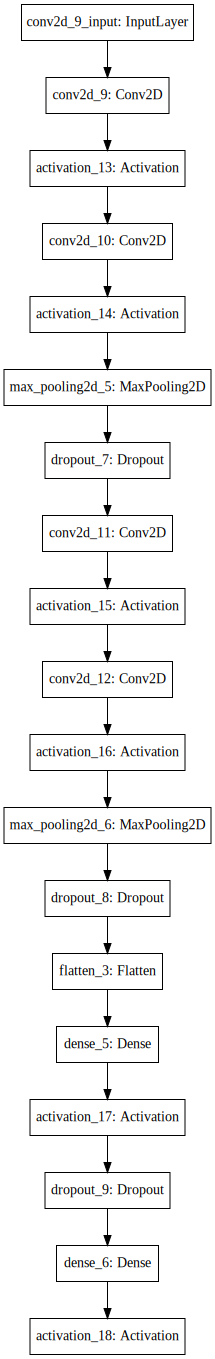

In [21]:
SVG(model_to_dot(model).create(prog='dot', format='svg'))

### Testing the model

(True count, Predicted count)


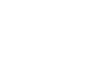

0 0.0


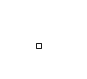

1 1.0


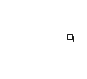

2 2.0


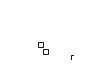

3 2.0


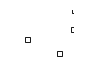

4 3.0


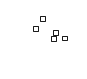

5 5.0


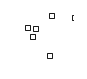

6 5.0


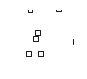

7 6.0


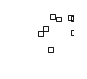

8 7.0


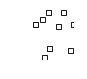

9 8.0


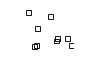

10 9.0


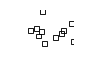

11 9.0


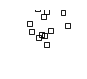

12 10.0


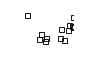

13 10.0


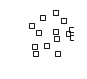

14 12.0


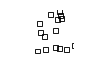

15 13.0


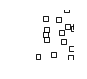

16 13.0


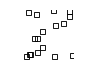

17 15.0


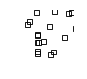

18 16.0


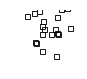

19 16.0


In [15]:
print("(True count, Predicted count)")
for i in range(max_count):
    test_fig = [get_figure(i)]
    x_test = np.expand_dims(test_fig, -1).astype('float32')
    x_test /= 255
    pred = model.predict(x_test)
    print i, round(pred[0][0]*max_count)